In [3]:
# 1. Import các thư viện cần thiết.
# 2. Load dữ liệu vào DataFrame.
# 3. Chia dữ liệu thành biến độc lập và biến phụ thuộc.
# 4. Chia dữ liệu thành tập huấn luyện và tập kiểm tra.
# 5. Khởi tạo và huấn luyện mô hình hồi quy tuyến tính.
# 6. Đánh giá hiệu suất của mô hình.
# 7. Sử dụng mô hình đã huấn luyện để dự đoán giá nhà mới.

In [1]:
import pandas as pd # cung cấp các cấu trúc dữ liệu và công cụ phân tích dữ liệu 
import numpy as np #cung cấp các công cụ cho tính toán

from sklearn.linear_model import LinearRegression #cung cấp mô hình hồi quy tuyến tính 
from sklearn.metrics import mean_squared_error #cung cấp hàm mean_squared_error để tính toán độ lỗi trung bình
from sklearn.metrics import r2_score #tính toán hệ số xác định R^2

from sklearn.model_selection import train_test_split # chia dữ liệu train và test

import matplotlib.pyplot as plt #công cụ để tạo biểu đồ và hình vẽ 
import seaborn as sns # trực quan hóa dữ liệu dựa trên matplotlib



In [2]:
data= pd.read_excel('house_price.xls')
print(data)

                    date    price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0    2014-05-02 00:00:00   313000         3       1.50         1340      7912   
1    2014-05-02 00:00:00  2384000         5       2.50         3650      9050   
2    2014-05-02 00:00:00   342000         3       2.00         1930     11947   
3    2014-05-02 00:00:00   420000         3       2.25         2000      8030   
4    2014-05-02 00:00:00   550000         4       2.50         1940     10500   
..                   ...      ...       ...        ...          ...       ...   
995  2014-05-20 00:00:00  1800000         4       3.50         4460     16953   
996  2014-05-20 00:00:00   299950         3       1.00          910      8000   
997  2014-05-20 00:00:00   749950         3       2.50         2770     10773   
998  2014-05-20 00:00:00  1100000         3       2.00         2390      6888   
999  2014-05-20 00:00:00   555000         3       2.50         3050    158558   

     floors  waterfront  vi

In [3]:
# Loại bỏ các cột không cần thiết
data_drop = data.drop(['date','waterfront','view','condition','yr_built','yr_renovated','street','city','statezip','country'], axis=1)
print (data_drop)

       price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  sqft_above  \
0     313000         3       1.50         1340      7912     1.5        1340   
1    2384000         5       2.50         3650      9050     2.0        3370   
2     342000         3       2.00         1930     11947     1.0        1930   
3     420000         3       2.25         2000      8030     1.0        1000   
4     550000         4       2.50         1940     10500     1.0        1140   
..       ...       ...        ...          ...       ...     ...         ...   
995  1800000         4       3.50         4460     16953     1.0        2550   
996   299950         3       1.00          910      8000     1.0         740   
997   749950         3       2.50         2770     10773     2.0        2770   
998  1100000         3       2.00         2390      6888     2.0        2390   
999   555000         3       2.50         3050    158558     1.0        3050   

     sqft_basement  
0                0

In [4]:
# Tổng số giá trị null trong mỗi cột
null_values = data_drop.isnull().sum()
print(null_values)

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
sqft_above       0
sqft_basement    0
dtype: int64


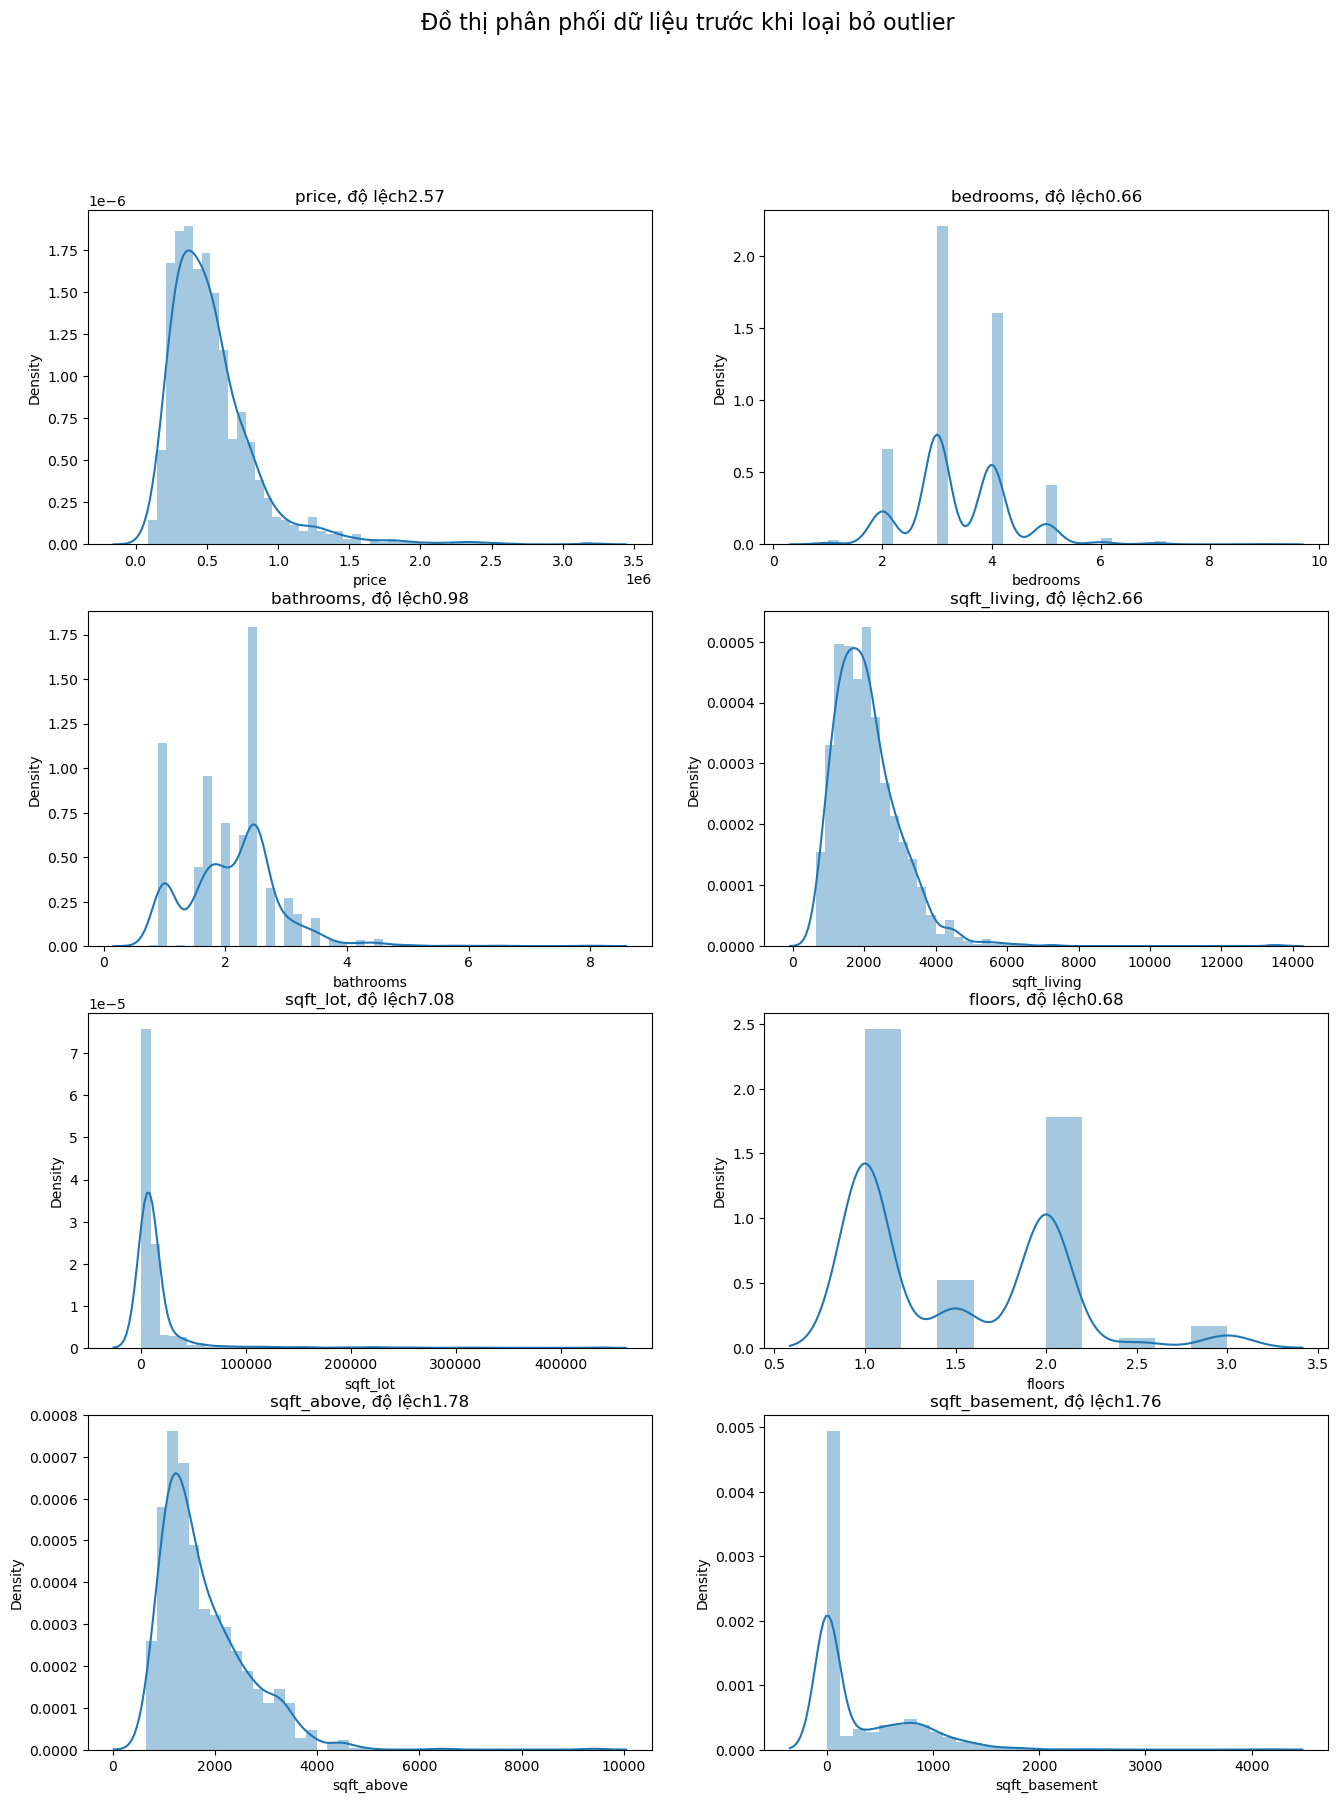

In [5]:
import warnings
warnings.filterwarnings('ignore')
def dist_custom(dataset, columns_list, rows, cols, suptitle):
     #Tạo lượt đồ thị con kích thước 16x20(đơn vị)
    fig, axs = plt.subplots(rows, cols, figsize=(16,20))
    #Thêm tiêu đề cho các biểu đồ có kích thước là 16 đơn vị
    fig.suptitle(suptitle, size=16)
    #Làm phẳng mản 2D của đồ thị con thành mảng 1D
    axs=axs.flatten()
    for i, data in enumerate(columns_list):
        #Vẽ đồ thị phân phối sử dụng Seaborn
        sns.distplot(dataset[data], ax=axs[i])
         #Đặt tiêu đề cho mỗi đồ thị
        axs[i].set_title(data+', độ lệch' + str(round(dataset[data].skew(axis=0, skipna=True),2)))
dist_custom(dataset=data_drop, columns_list=data_drop.columns, rows=4, cols=2, suptitle='Đồ thị phân phối dữ liệu trước khi loại bỏ outlier')

In [7]:
# Q1 = data_drop.quantile(0.25)
# Q3 = data_drop.quantile(0.75)
# IQR = Q3 - Q1

# # Xác định các outlier
# outliers = ((data_drop < (Q1 - 1.5 * IQR)) | (data_drop > (Q3 + 1.5 * IQR))).any(axis=1)

# # Loại bỏ outlier
# cleaned_df = data_drop[~outliers]

# # In ra số lượng outlier đã loại bỏ
# print("Số lượng outlier đã loại bỏ:", outliers.sum())

# # In ra số lượng hàng còn lại sau khi loại bỏ outlier
# print("Số lượng hàng còn lại sau khi loại bỏ outlier:", cleaned_df.shape[0])

Số lượng outlier đã loại bỏ: 193
Số lượng hàng còn lại sau khi loại bỏ outlier: 807


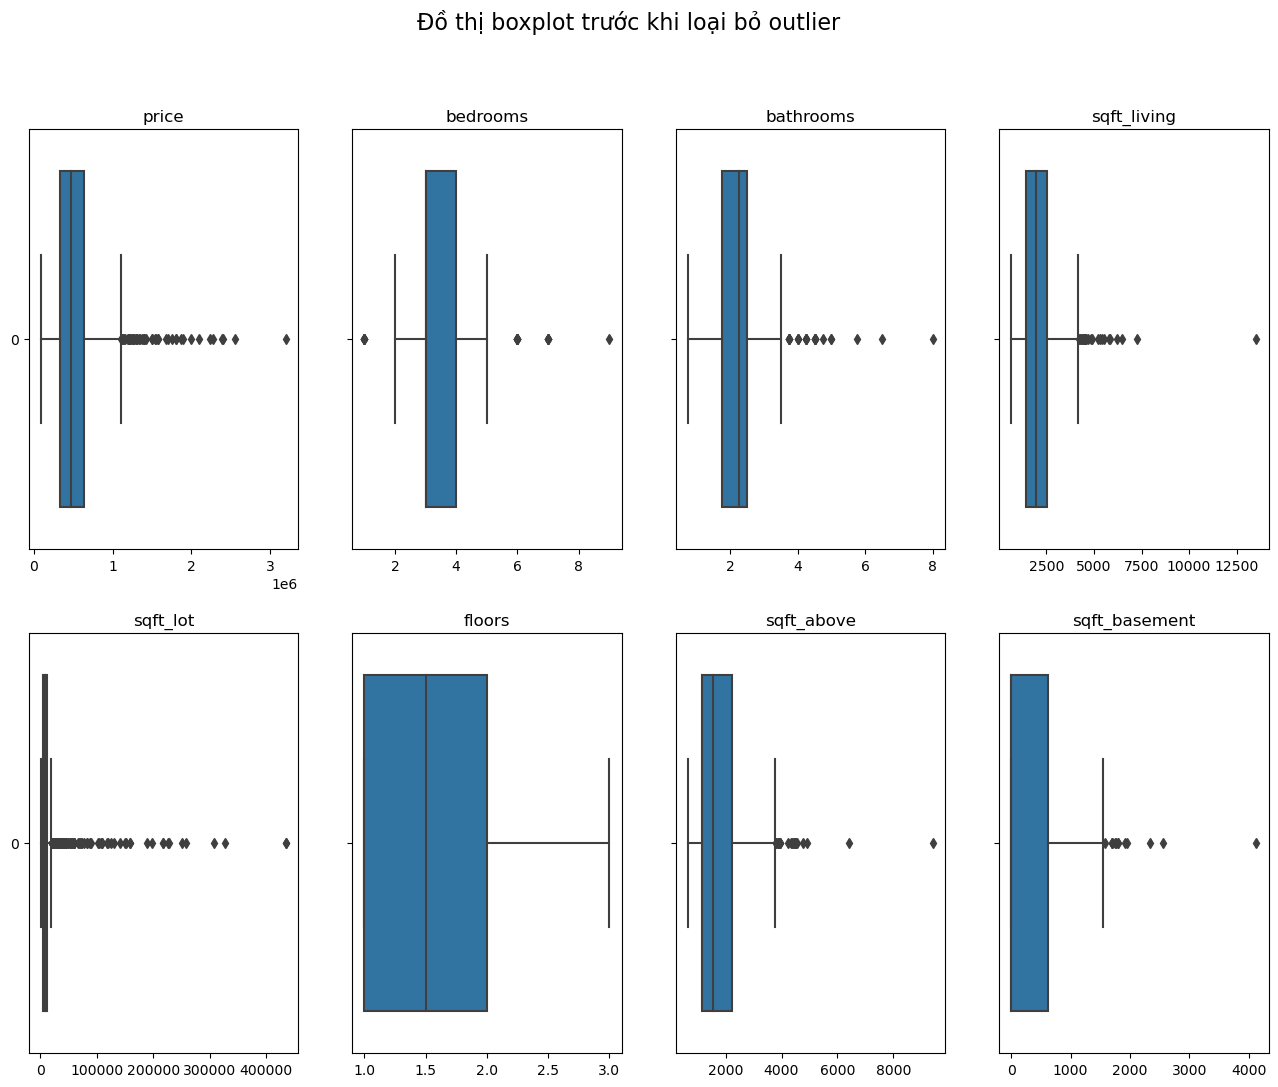

In [6]:
# Xây dựng 1 hàm để vẽ đồ thị boxplot cho dữ liệu
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    # Tạo lưới đồ thị con
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,12)) 
    fig.suptitle(suptitle, size=16) # Tạo tiêu đề chung
    axs = axs.flatten() # Làm phẳng mang 2D thành mảng 1D

    # chạy vòng lặp for để tiến hành vẽ các đồ thị con
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data) # đặt tiêu đề cho từng đồ thị

# Tiến hành gọi hàm để vẽ đồ thị phân phối dữ liệu trước khi loại bỏ outliers
boxplots_custom(dataset=data_drop, columns_list= data_drop.columns, rows=2, cols=4, suptitle='Đồ thị boxplot trước khi loại bỏ outlier')

In [7]:
# Xác định Q1, Q3
Q1 = data_drop.quantile(0.25)
Q3 = data_drop.quantile(0.75)
IQR = Q3 - Q1
print('IQR: ', IQR)

# Tính giới hạn trên, dưới
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

# Xác định các outlier
outliers = ((data_drop < lower) | (data_drop > upper)).any(axis=1)

# số lượng outlier của dữ liệu 
print('Số lượng outlier', outliers.sum())

#  Loại bỏ outlier
clean_data = data_drop[~outliers]

# Kích thước dữ liệu sau khi loại bỏ outlier
print('Kích thước dữ liệu sau khi loại bỏ outliers', clean_data.shape)

IQR:  price            310000.00
bedrooms              1.00
bathrooms             0.75
sqft_living        1120.00
sqft_lot           5710.50
floors                1.00
sqft_above         1052.50
sqft_basement       620.00
dtype: float64
Số lượng outlier 193
Kích thước dữ liệu sau khi loại bỏ outliers (807, 8)


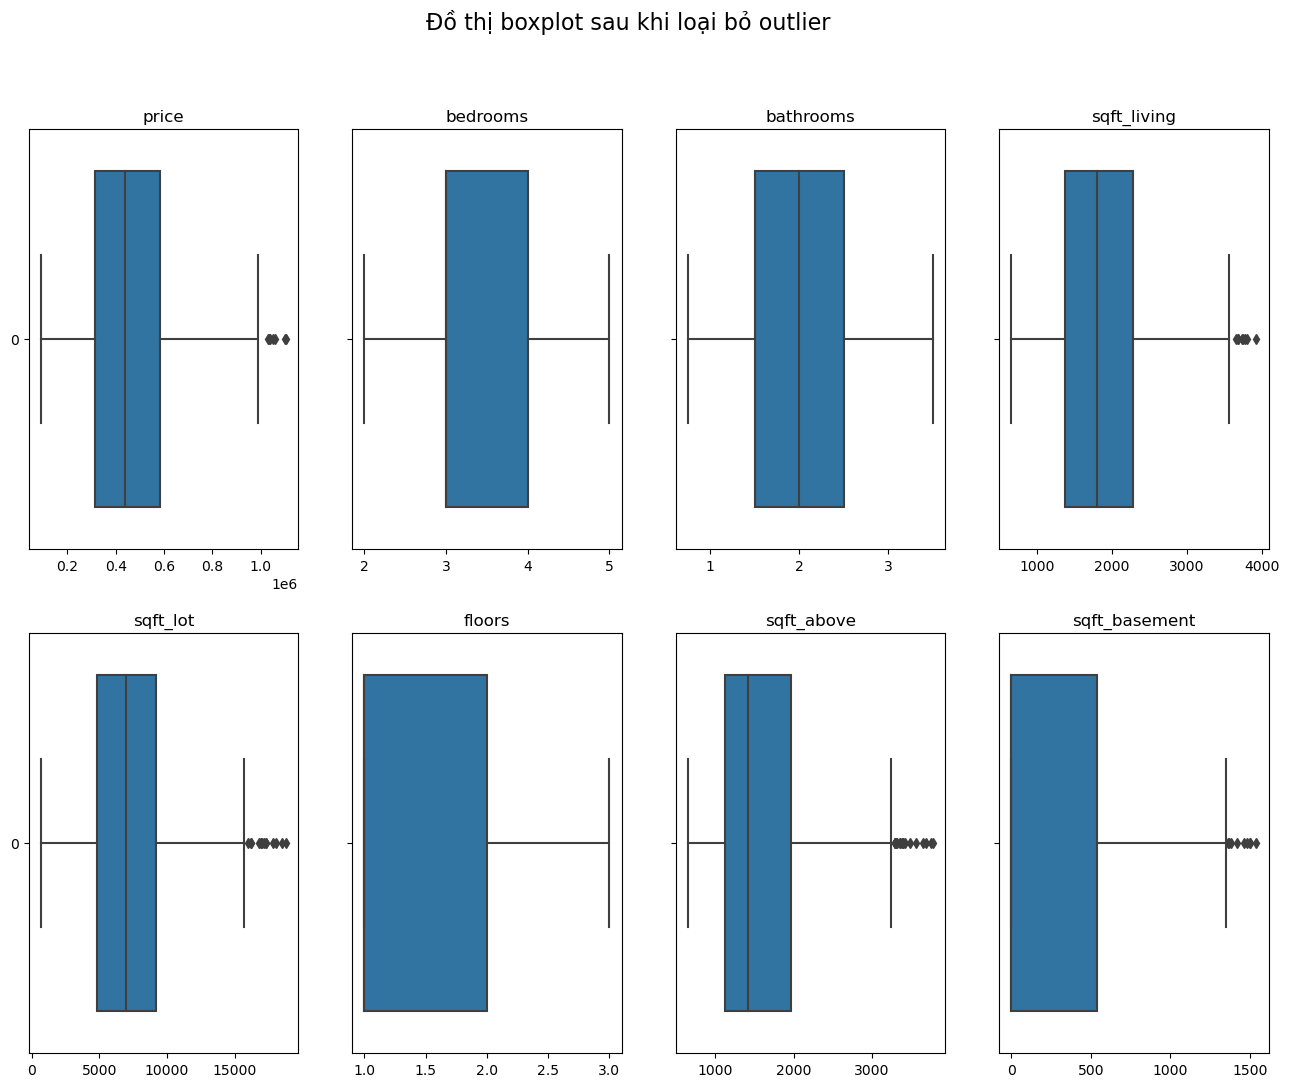

In [8]:
boxplots_custom(dataset=clean_data, columns_list= clean_data.columns, rows=2, cols=4, suptitle='Đồ thị boxplot sau khi loại bỏ outlier')

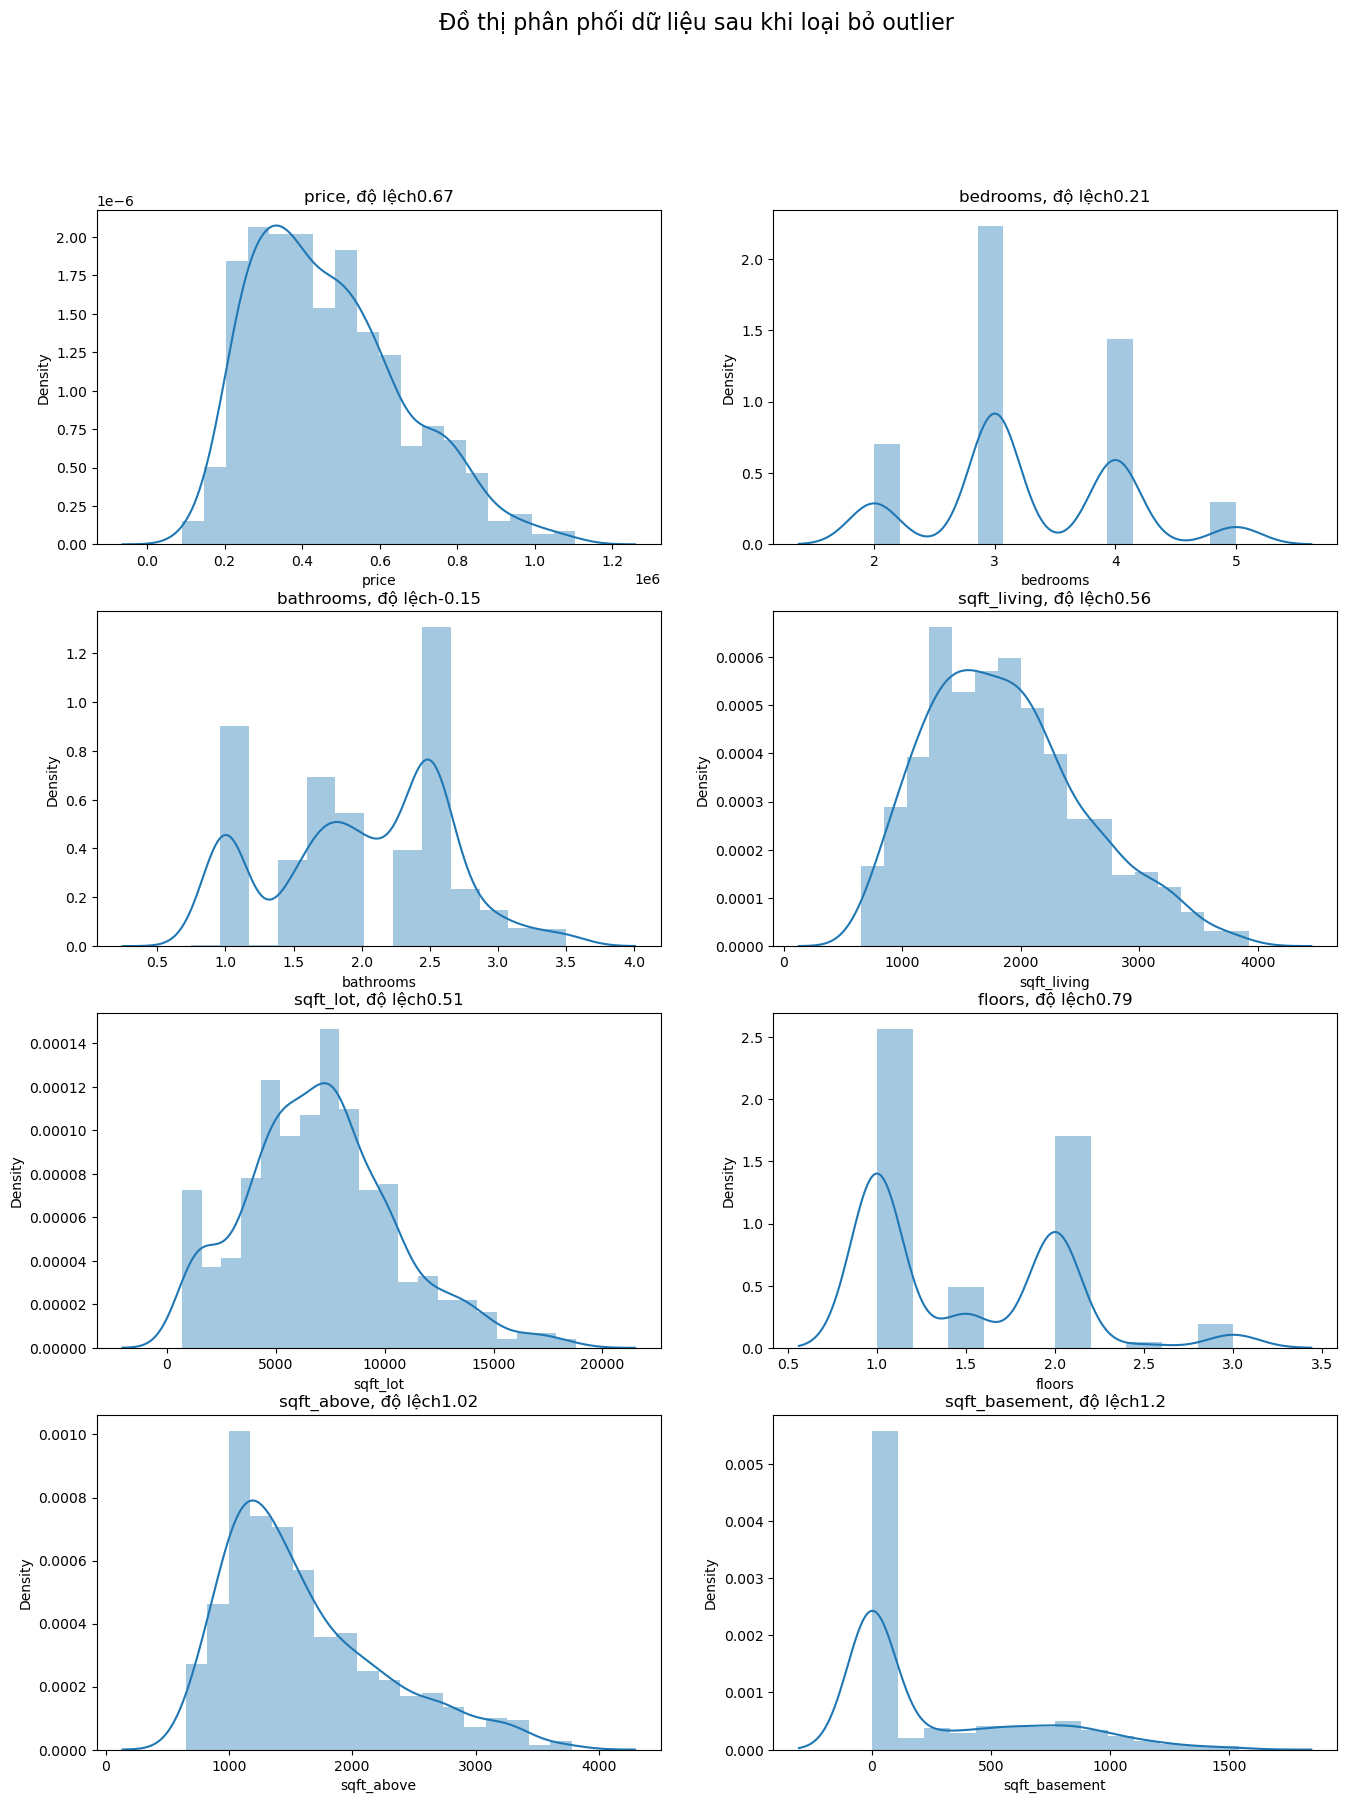

In [9]:
dist_custom(dataset=clean_data, columns_list=clean_data.columns, rows=4, cols=2, suptitle='Đồ thị phân phối dữ liệu sau khi loại bỏ outlier')

In [10]:
# Mô tả chung dữ liệu
data_drop.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.411635e+05,3.393000,2.124500,2091.930000,15355.208000,1.496500,1781.051000,310.879000
std,3.246988e+05,0.921629,0.774903,962.843288,35024.774951,0.549126,844.135117,463.047117
min,9.000000e+04,1.000000,0.750000,650.000000,681.000000,1.000000,650.000000,0.000000
25%,3.300000e+05,3.000000,1.750000,1420.000000,5010.250000,1.000000,1160.000000,0.000000
50%,4.750000e+05,3.000000,2.250000,1940.000000,7594.000000,1.500000,1550.000000,0.000000
75%,6.400000e+05,4.000000,2.500000,2540.000000,10720.750000,2.000000,2212.500000,620.000000
max,3.200000e+06,9.000000,8.000000,13540.000000,435600.000000,3.000000,9410.000000,4130.000000


In [11]:
# Chọn các biến độc lập x và biến phụ thuộc y 
x = data_drop[['bedrooms', 'bathrooms', 'sqft_living','sqft_lot','floors','sqft_above','sqft_basement']]  # Đây là các biến độc lập 
y = data_drop['price']  # Đây là biến phụ thuộc 

In [12]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Kết hợp x_train và y_train thành một DataFrame
data_train = pd.concat([x_train, y_train], axis=1)

# Kết hợp x_test và y_test thành một DataFrame
data_test = pd.concat([x_test,y_test],axis = 1)


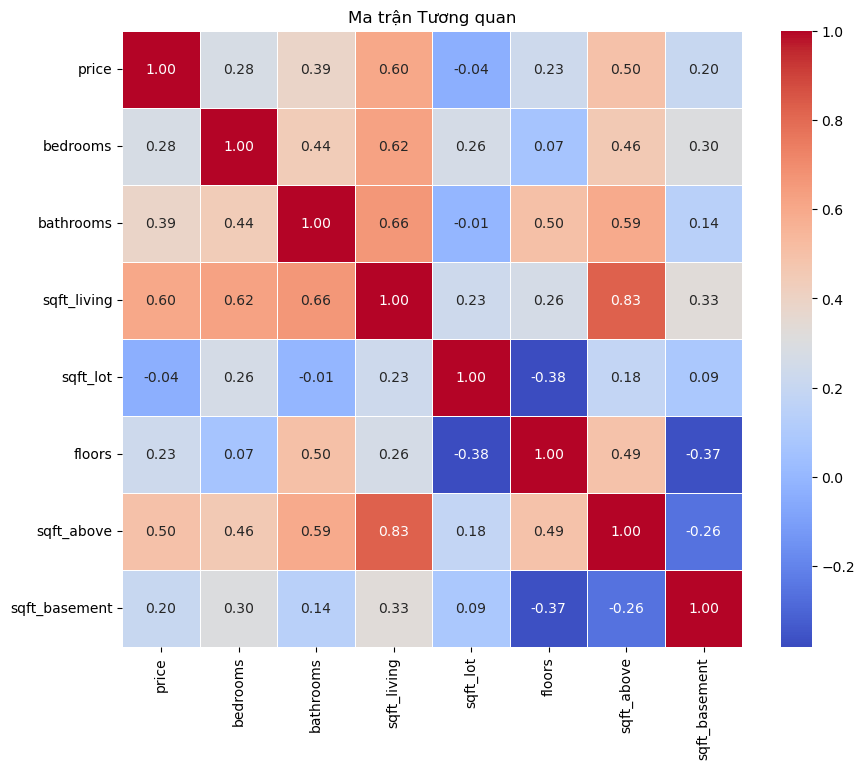

In [13]:
# Tạo ma trận tương quan để biết nhưng biến độc lập được đưa vào có ý nghĩa nhiều không 
corr_matrix = clean_data.corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Ma trận Tương quan')
plt.show()

In [14]:
# Đưa tham số x_train, y_train vào xây dựng mô hình hồi quy
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [ ]:
# Ước lượng tham số 
print ('R^2: ', lm.score(x_train,y_train)) # Các biến độc lập đưa vào ảnh hưởng đến biến phụ thuộc bao nhiêu
print ('Slope: ', lm.coef_) # Hệ số hồi quy (Trọng số) của từng biến độc lập
print ('intercept: ', lm.intercept_) #Hệ số chặn Bo: giá trị của biến phục thuộc khi các biến độc lập bằng 0

# Xem Hệ số hồi quy (trọng số) của từng biến độc lập
pd.DataFrame(lm.coef_, x_train.columns)

R^2:  0.4996667172943122
Slope:  [-2.43976625e+04 -3.98682040e+04  1.86644751e+02 -1.06160278e+00
  3.41732108e+04  9.07082996e+01  9.59364515e+01]
intercept:  92559.794299978


In [ ]:
import numpy as np
import statsmodels.api as sm

# Ước lượng mô hình hồi quy tuyến tính bằng OLS
model = sm.OLS(y_train, x_train)
results = model.fit()

# In kết quả
print(results.summary())

# Lấy các hệ số ước lượng
print('Các hệ số ước lượng:', results.params)


In [17]:
# Dự báo giá dựa vào tập test
y_pred = lm.predict(x_test)

# Tạo DataFrame từ dự đoán
y_pred_df = pd.DataFrame(y_pred, columns=['Price_predict'], index=x_test.index)

# Kết hợp các DataFrame và so sánh kết quả
result_compare = pd.concat([x_test, y_test, y_pred_df], axis=1)
result_compare['Deviation'] = result_compare['Price_predict'] - result_compare['price']

# Hiển thị kết quả
result_compare

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,price,Price_predict,Deviation
521,2,2.50,1480,1369,3.0,1480,0,420000,455642.772675,35642.772675
737,5,1.75,2000,3750,2.0,2000,0,585000,519873.637599,-65126.362401
740,4,3.00,3150,9130,2.0,3150,0,695000,807680.630426,112680.630426
660,4,1.75,2010,8625,1.0,1340,670,364000,511199.167947,147199.167947
411,3,1.50,1500,6337,1.0,1500,0,270000,403039.910969,133039.910969
...,...,...,...,...,...,...,...,...,...,...
408,2,1.00,1840,3300,1.5,1130,710,490000,565694.393526,75694.393526
332,4,2.50,1810,6509,2.0,1810,0,270000,458744.105374,188744.105374
208,3,1.00,1230,9568,1.0,1230,0,387000,344658.650682,-42341.349318
613,3,1.00,1390,12823,1.0,1390,0,319000,385579.621739,66579.621739


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from scipy import stats


# Tính toán RMSE để đánh giá hiệu suất của mô hình
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Tính residual (phần dư) giữa dữ liệu thực tế và dự đoán
residuals = y_test - y_pred

# Kiểm định t-test
t_statistic, p_value = stats.ttest_1samp(residuals, 0)

# In kết quả
print("Root Mean Squared Error (RMSE):", rmse)
print("T-Statistic:", t_statistic)
print("P-value:", p_value)

Root Mean Squared Error (RMSE): 185152.27839123693
T-Statistic: -0.22197578770415174
P-value: 0.8245603657683838


In [27]:
# Kiểm định t-test cho từng biến độc lập
for column in x_test.columns:
    t_stat, p_val = stats.ttest_ind(result_compare[column], result_compare['Deviation'], equal_var=False)
    print(f'Biến độc lập "{column}":')
    print(f'  - Giá trị t-score: {t_stat}')
    print(f'  - Giá trị p-value: {p_val}')
    if p_val < 0.05:
        print('    => Có đủ bằng chứng để bác bỏ giả thiết không có ảnh hưởng.')
    else:
        print('    => Không đủ bằng chứng để bác bỏ giả thiết không có ảnh hưởng.')
    print()

Biến độc lập "bedrooms":
  - Giá trị t-score: -0.22172318687367107
  - Giá trị p-value: 0.8247567422547195
    => Không đủ bằng chứng để bác bỏ giả thiết không có ảnh hưởng.

Biến độc lập "bathrooms":
  - Giá trị t-score: -0.22181948379586366
  - Giá trị p-value: 0.8246818779693934
    => Không đủ bằng chứng để bác bỏ giả thiết không có ảnh hưởng.

Biến độc lập "sqft_living":
  - Giá trị t-score: -0.07031657324902088
  - Giá trị p-value: 0.9440123002423422
    => Không đủ bằng chứng để bác bỏ giả thiết không có ảnh hưởng.

Biến độc lập "sqft_lot":
  - Giá trị t-score: 0.989312055649631
  - Giá trị p-value: 0.3236057130420199
    => Không đủ bằng chứng để bác bỏ giả thiết không có ảnh hưởng.

Biến độc lập "floors":
  - Giá trị t-score: -0.22186758463347006
  - Giá trị p-value: 0.8246444834524482
    => Không đủ bằng chứng để bác bỏ giả thiết không có ảnh hưởng.

Biến độc lập "sqft_above":
  - Giá trị t-score: -0.09321820520744416
  - Giá trị p-value: 0.9258239907260599
    => Không đủ b

In [32]:
from scipy.stats import f

# Số lượng biến độc lập
k = x_train.shape[1]

# Số lượng quan sát
n = len(y_train)

# Độ tự do của mô hình
df_model = k - 1

# Độ tự do của sai số
df_residual = n - k

# Giá trị của F-statistic
f_statistic = (lm.score(x_train, y_train) / df_model) / ((1 - lm.score(x_train, y_train)) / df_residual)

# Giá trị p-value
p_value = f.cdf(f_statistic, df_model, df_residual)

print(f'Giá trị F-statistic: {f_statistic}')
print(f'Giá trị p-value: {p_value}')
if p_value < 0.05:
    print('=> Có đủ bằng chứng để bác bỏ giả thiết không có ảnh hưởng của bất kỳ biến độc lập nào.')
else:
    print('=> Không đủ bằng chứng để bác bỏ giả thiết không có ảnh hưởng của bất kỳ biến độc lập nào.')



Giá trị F-statistic: 131.9905885771572
Giá trị p-value: 0.9999999999999999
=> Không đủ bằng chứng để bác bỏ giả thiết không có ảnh hưởng của bất kỳ biến độc lập nào.


In [18]:
# Đánh giá mô hình sau khi test
# Tính toán MSE
mse_test = mean_squared_error(y_test, y_pred) 
# MSE đo lường trung bình của bình phương sai số giữa giá trị dự đoán và giá trị thực tế trên tập kiểm tra. 
# Giá trị MSE này khá lớn, điều này có thể chỉ ra rằng mô hình của có xu hướng dự đoán sai lệch lớn so với giá trị thực tế trên tập kiểm tra.

# Tính toán R^2
r2_test = r2_score(y_test, y_pred)
# R^2 là một phép đo đánh giá khả năng giải thích của mô hình trên tập dữ liệu kiểm tra. 
# Giá trị này nằm trong khoảng từ 0 đến 1, và giá trị càng gần 1 thì mô hình giải thích tốt hơn sự biến thiên của dữ liệu. 
# Trong trường hợp này, giá trị R^2 không quá cao, điều này có thể chỉ ra rằng mô hình của bạn không giải thích hết sự biến thiên của dữ liệu trên tập kiểm tra.

print("Mean Squared Error trên tập kiểm tra:", mse_test)
print("R-squared trên tập kiểm tra:", r2_test)

Mean Squared Error trên tập kiểm tra: 34281366193.4661
R-squared trên tập kiểm tra: 0.5823224427314686


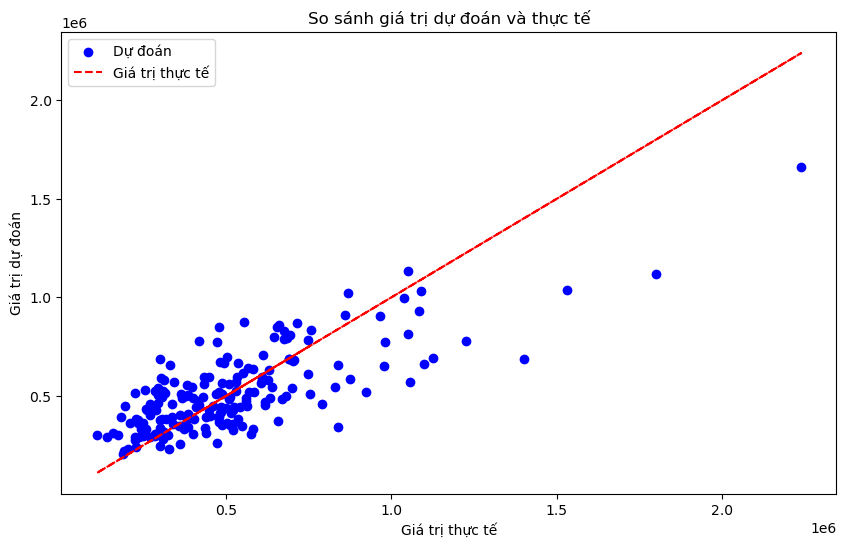

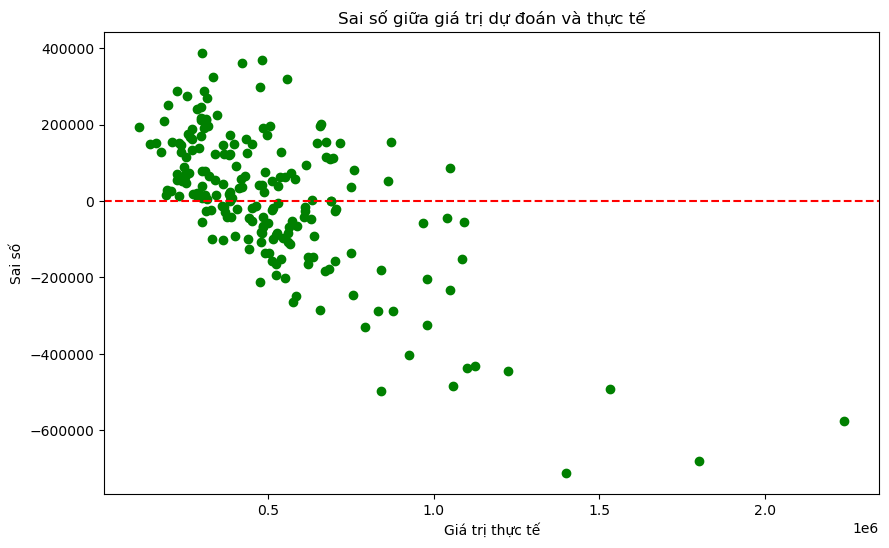

In [19]:
# Biểu đồ scatter plot giữa giá trị thực tế và giá trị dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(result_compare['price'], result_compare['Price_predict'], color='blue', label='Dự đoán')
plt.plot(result_compare['price'], result_compare['price'], color='red', linestyle='--', label='Giá trị thực tế')
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.title('So sánh giá trị dự đoán và thực tế')
plt.legend()
plt.show()

# Biểu đồ dự đoán và sai số
plt.figure(figsize=(10, 6))
plt.scatter(result_compare['price'], result_compare['Deviation'], color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Giá trị thực tế')
plt.ylabel('Sai số')
plt.title('Sai số giữa giá trị dự đoán và thực tế')
plt.show()